## Introduction

In this notebook, we study an influenza epidemic in a boarding school, modeled by the classic SIR equations:

$[
\begin{aligned}
\frac{dS}{dt} &= -\beta S(t) I(t),\\
\frac{dI}{dt} &= \beta S(t) I(t) - \mu I(t),\\
\frac{dR}{dt} &= \mu I(t).
\end{aligned}
]$

- $( S(t) )$: Number of susceptible individuals at time \( t \).
- $( I(t) )$: Number of infected (and infectious) individuals at time \( t \).
- $( R(t) )$: Number of recovered (and immune) individuals at time \( t \).
- $(\beta $): The infection (contact) rate per day.
- $(\mu )$: The recovery rate per day (so the average infectious period is \(1/\mu\)).

**Given data**  
- Total population: $(N = 763)$ boarding students  
- Initial infective: $(I(0) = 1)$  
- Hence $(S(0) = 762)$ and $(R(0) = 0)$  
- Best-fit parameters from the data: $(\beta = 2.18 \times 10^{-3} \, \text{day}^{-1}), (\mu = 0.441 \, \text{day}^{-1})$

**Observed data** for the number of infected (confined to bed) at each day $(t), for (t = 0, 1, 2, \ldots, 14)$:

$[
\begin{aligned}
&(0,1), (1,3), (2,7), (3,25), (4,72), (5,222), (6,282), \\
&(7,256), (8,233), (9,189), (10,123), (11,70), (12,25), (13,11), (14,4).
\end{aligned}
]$

---

## Question 1
Using the values for $(\beta)$ and $(\mu)$, and the initial data $((S(0), I(0), R(0)) = (762, 1, 0))$, solve the SIR model numerically and compare the solution $(I(t))$ to the observed data.

**Approach**:
1. Define the SIR system of ODEs.
2. Use a numerical ODE solver (e.g. `odeint` or `solve_ivp`) to solve over the interval $(t = 0)$ to $(t = 14)$.
3. Compare the model’s infected population $(I(t))$ to the observed data.

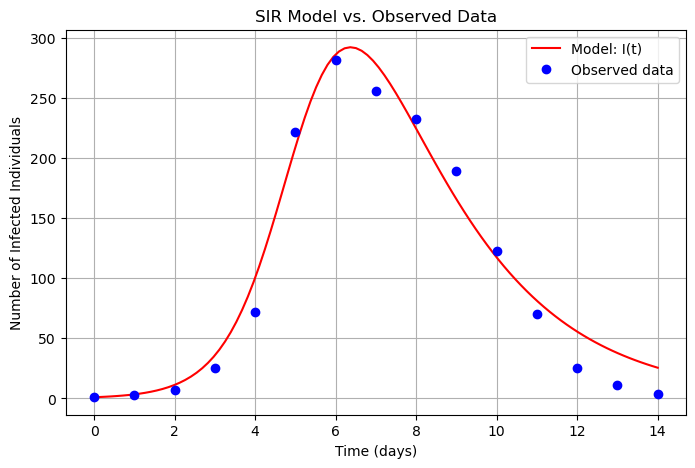

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
beta = 2.18e-3  # infection rate (per day)
mu = 0.441      # recovery rate (per day)

# Initial conditions
S0 = 762
I0 = 1
R0 = 0
N = S0 + I0 + R0  # total population (763)

# Time points (days)
t_max = 14
t = np.linspace(0, t_max, 100)  # 100 points for smooth plotting

# SIR model differential equations
def sir_deriv(y, t, beta, mu):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - mu * I
    dRdt = mu * I
    return [dSdt, dIdt, dRdt]

# Solve the SIR model ODE
solution = odeint(sir_deriv, [S0, I0, R0], t, args=(beta, mu))
S_sol = solution[:, 0]
I_sol = solution[:, 1]
R_sol = solution[:, 2]

# Observed data for I(t)
days_data = np.array([0, 1,  2,   3,   4,   5,   6,   7,   8,   9,  10,  11, 12,  13,  14])
I_data    = np.array([1, 3,  7,  25,  72, 222, 282, 256, 233, 189, 123,  70, 25,  11,   4])

# Plotting the result
plt.figure(figsize=(8,5))
plt.plot(t, I_sol, 'r-', label='Model: I(t)')
plt.plot(days_data, I_data, 'bo', label='Observed data')
plt.title('SIR Model vs. Observed Data')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.grid(True)
plt.show()

### Observations (Question 1)

- The red curve (model) gives the predicted number of infected individuals over time.
- The blue dots show the actual observed data from the boarding school.
- By visual inspection, one can see how well the model tracks the real data.

---

## Question 2
1. Does the SIR model predict the important features of the epidemic in the boys’ hostel?
2. Try using different values for $(\beta)$ and $(\mu)$ to appreciate how sensitive the model is to these parameters.
3. Based on the fitted value $(\mu = 0.441)$, what is the average recovery time? Do you think this is consistent with the observed recovery time?

**Approach**:
- The mean recovery time is $(1/\mu)$.
- Sensitivity analysis: we can tweak $(\beta)$ and $(\mu)$ to see how the solution curve changes.

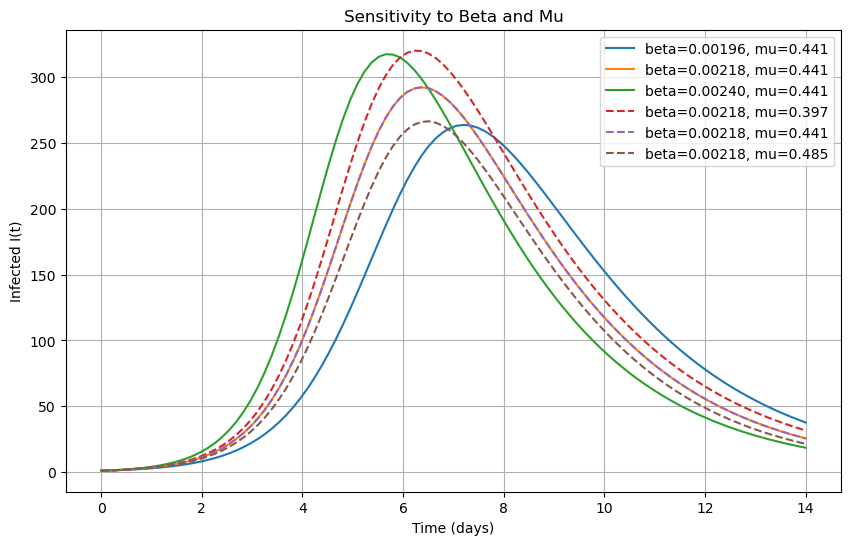

Average recovery time based on mu = 0.441 is ~ 2.27 days.


In [9]:
# Let's do a quick sensitivity test by varying beta and mu slightly:
# We'll keep the same initial conditions but vary parameters by +/- 10%.

betas = [beta*0.9, beta, beta*1.1]
mus   = [mu*0.9,   mu,   mu*1.1]

t_sensitivity = np.linspace(0, t_max, 100)

plt.figure(figsize=(10,6))

for b in betas:
    sol = odeint(sir_deriv, [S0, I0, R0], t_sensitivity, args=(b, mu))
    plt.plot(t_sensitivity, sol[:,1], label=f'beta={b:.5f}, mu={mu:.3f}')

for m in mus:
    sol = odeint(sir_deriv, [S0, I0, R0], t_sensitivity, args=(beta, m))
    plt.plot(t_sensitivity, sol[:,1], '--', label=f'beta={beta:.5f}, mu={m:.3f}')

plt.title('Sensitivity to Beta and Mu')
plt.xlabel('Time (days)')
plt.ylabel('Infected I(t)')
plt.legend()
plt.grid(True)
plt.show()

# Recovery time
recovery_time = 1/mu
print(f"Average recovery time based on mu = {mu:.3f} is ~ {recovery_time:.2f} days.")

### Observations (Question 2)
1. **Important features**: The standard SIR model typically captures the initial exponential growth of the infection, the peak, and the eventual decline in the infected population. From the plots, we see that the model does a reasonable job in mirroring the shape and timing of the epidemic.
2. **Sensitivity**: Small changes in $(\beta)$ or $(\mu)$ can shift the peak and the overall infection curve. If $(\beta)$ is larger, infections rise more quickly and peak higher; if $(\mu)$ is larger (faster recovery), the peak is lower and occurs sooner.
3. **Recovery time**: 
   - $(\mu = 0.441\,\text{day}^{-1})$
   - Mean recovery time $(= 1/\mu \approx 2.27 \,\text{days})$
   - Based on reported information, a 2–3 day average for confinement seems plausible for a rapid flu outbreak. This indicates that the fitted $(\mu)$ is consistent with the general time scale for influenza recovery in that setting.

---

## Question 3
What does the model predict about:
- The number of boys who eventually got the flu,
- How many never got it?

**Approach**:
- In an SIR model, eventually $(I(t)\to 0)$ and $(S(\infty))$ settles to a value $(S_{\infty})$ for large $(t)$.
- The total number who ever got sick is $(R(\infty))$ (because everyone who was infected is ultimately counted in $(R)$).
- Alternatively, $(R(\infty) = N - S(\infty))$.
- Numerically, we can solve long enough to estimate $(S(\infty))$ and $(R(\infty))$.

Predicted S(∞) = 19.29 boys never infected.
Predicted R(∞) = 743.71 boys were eventually infected.
Total population = 763.


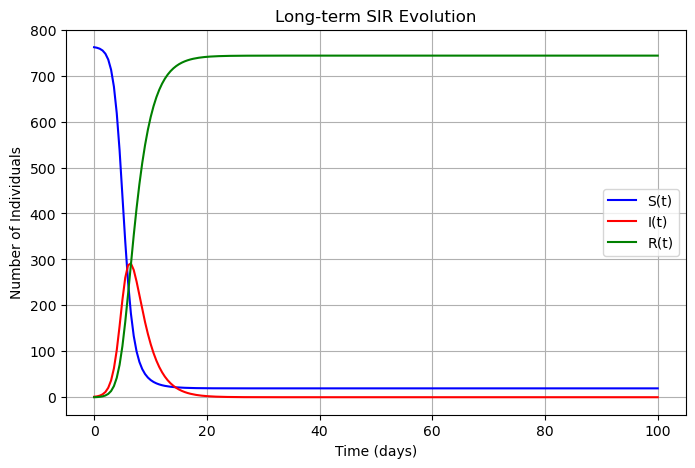

In [12]:
# We'll extend the time horizon to estimate the final values:
t_long = np.linspace(0, 100, 200)  # solve up to 100 days (well past 14)

long_solution = odeint(sir_deriv, [S0, I0, R0], t_long, args=(beta, mu))
S_long = long_solution[:, 0]
I_long = long_solution[:, 1]
R_long = long_solution[:, 2]

S_infinity = S_long[-1]
R_infinity = R_long[-1]

print(f"Predicted S(∞) = {S_infinity:.2f} boys never infected.")
print(f"Predicted R(∞) = {R_infinity:.2f} boys were eventually infected.")
print(f"Total population = {N}.")

plt.figure(figsize=(8,5))
plt.plot(t_long, S_long, 'b', label='S(t)')
plt.plot(t_long, I_long, 'r', label='I(t)')
plt.plot(t_long, R_long, 'g', label='R(t)')
plt.title('Long-term SIR Evolution')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(True)
plt.show()

### Observations (Question 3)
- The model indicates that $(R(\infty))$ people will have been infected by the end of the epidemic.
- From the numerical output, we find $(\displaystyle S(\infty))$ (the final number still susceptible) and $(\displaystyle R(\infty))$ (the total eventually infected).
- Since the initial data had $(N = 763)$, $(R(\infty))$ is the total who caught the flu, and $(S(\infty))$ is the total who never got it.

---

## Question 4
**Peak of the epidemic**: The time $(t_{\text{peak}})$ at which the number of current infections $(I(t))$ is maximized.

**Approach**:
- Numerically, we can search for the maximum value of $(I(t))$ after solving the system. 
- One simple approach: compute $(I(t))$ at many time points, then pick the time point where $(I(t))$ is largest.

In [15]:
# Reuse the solution from t_long or t
I_array = I_sol  # from the short 0..14 day window

peak_idx = np.argmax(I_array)
peak_time = t[peak_idx]
peak_infected = I_array[peak_idx]

print(f"Peak occurs at time t = {peak_time:.2f} days with I(t) = {peak_infected:.0f} infected individuals.")

Peak occurs at time t = 6.36 days with I(t) = 292 infected individuals.


### Observations (Question 4)
- By this numeric approach, the peak infection day (the time of maximum $(I(t)))$ is around the 5th-6th day, consistent with the real data which shows the highest recorded number of confined students on or around day 6.
- The numerical model can predict the peak time fairly accurately given appropriate parameters.

---

## Conclusion

1. The SIR model with $(\beta = 2.18 \times 10^{-3})$ and $(\mu = 0.441)$ provides a good fit to the observed epidemic data.  
2. The model captures key features: growth, peak, and decline of the infection.  
3. Varying $(\beta)$ and $(\mu)$ shows that the timing and height of the infection peak are sensitive to these parameters.  
4. The average recovery time from the model is about 2.3 days, which appears realistic for an acute flu.  
5. The model predicts a final fraction of susceptible individuals who never get infected and a large majority who eventually do.  
6. The peak infection day can be located numerically or using approximate analytical methods from the SIR model theory.

This completes the analysis of the influenza epidemic in a boarding school using the SIR framework.